Saurav Parajuli
C0905417

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Loaded the dataset
df = pd.read_csv('algerian.csv')

In [3]:
#display the basic information of the dataset.
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
# Handle missing values
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [6]:
#Since there is no missing values, check for any duplicate.
df.drop_duplicates(inplace=True)

In [7]:
# Drop irrelevant columns
df_clean = df.drop(['Classes', 'Region'], axis=1)

In [8]:

# Check correlation between variables.
corr = df_clean.corr()  # Compute the correlation matrix
print(corr)


                  day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.350781  0.082639   NaN 

In [9]:
# Based on the correlation, selected relevant features for predicting 'FWI'
features = ['Temperature', 'RH', 'Ws', 'FFMC', 'ISI', 'BUI']
target = 'FWI'

In [10]:
X = df_clean[features]
y = df_clean[target]

In [11]:
X.head()

,Temperature,RH,Ws,FFMC,ISI,BUI
0,29,57,18,65.7,1.3,3.4
1,29,61,13,64.4,1.0,3.9
2,26,82,22,47.1,0.3,2.7
3,25,89,13,28.6,0.0,1.7
4,27,77,16,64.8,1.2,3.9


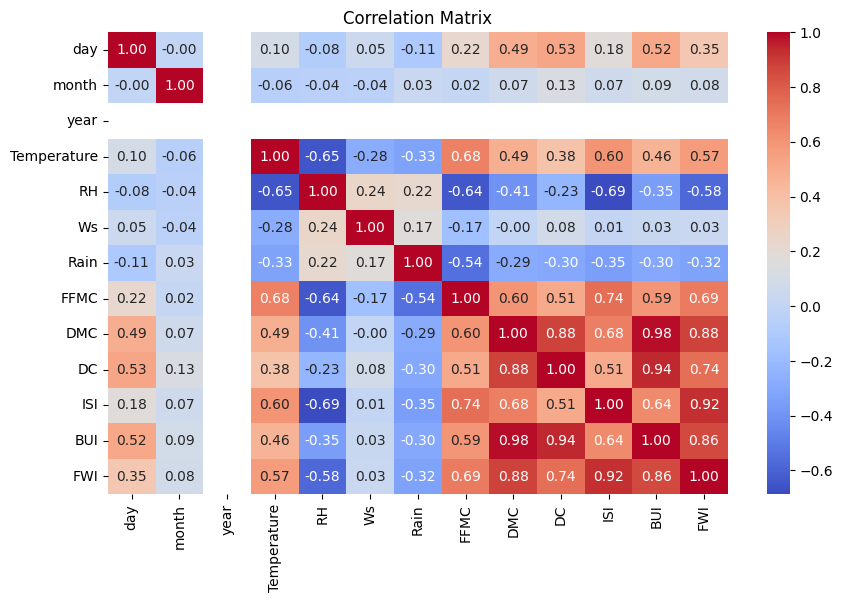

In [12]:
# Correlation matrix to observe relationships
import warnings
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

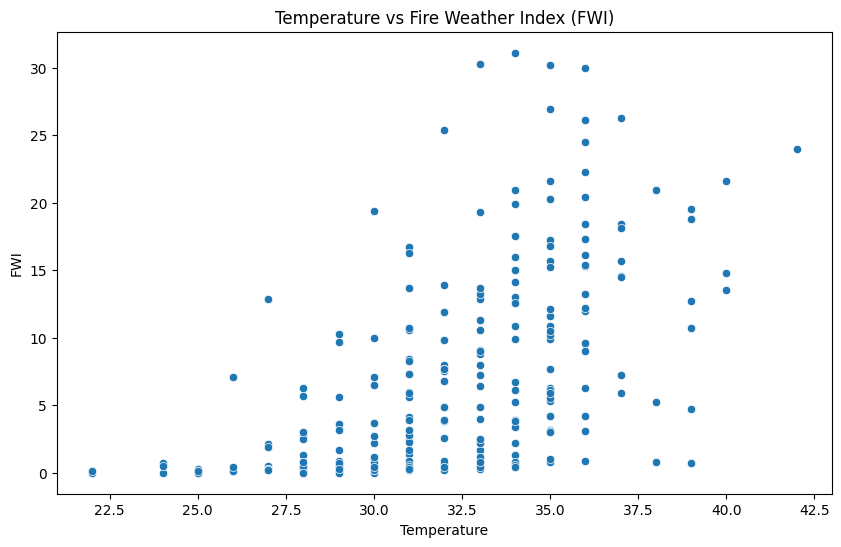

In [13]:
# Scatter plot for a few features against FWI
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['Temperature'], y=df['FWI'])
plt.title('Temperature vs Fire Weather Index (FWI)')
plt.show()

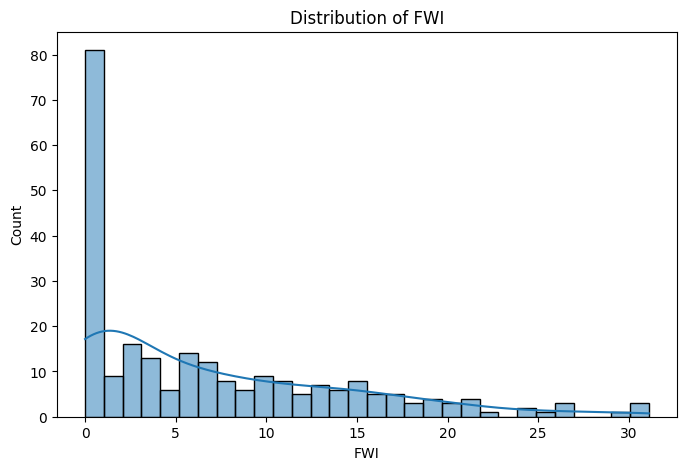

In [14]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['FWI'], bins=30, kde=True)
plt.title('Distribution of FWI')
plt.show()

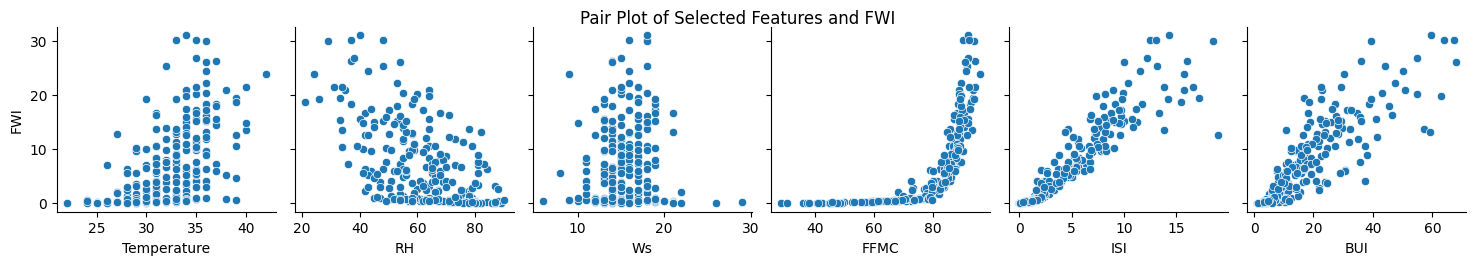

In [15]:
# Pairplot to visualize relationships between selected features and FWI
pair_plot = sns.pairplot(df_clean, x_vars=['Temperature', 'RH', 'Ws', 'FFMC', 'ISI', 'BUI'], y_vars='FWI', kind='scatter', diag_kind='kde')
pair_plot.fig.subplots_adjust(top=0.95)  
plt.suptitle('Pair Plot of Selected Features and FWI', y=1.02)  
plt.show()  # Show the plot

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [17]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))


Linear Regression MSE: 0.37905160088694917
Linear Regression R2: 0.9874935221882493


In [20]:
# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression MSE: 0.15540530629837715
Polynomial Regression R2: 0.9948725371149966


In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


Ridge Regression MSE: 0.3927182509149297
Ridge Regression R2: 0.9870426029600071
Lasso Regression MSE: 0.45043100850324413
Lasso Regression R2: 0.9851384207311382


In [22]:
# Cross-validation for Ridge
cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5)
print("Ridge CV Scores:", cv_scores)
print("Ridge CV Mean Score:", np.mean(cv_scores))


Ridge CV Scores: [0.98838088 0.97944509 0.85239962 0.98422878 0.97605656]
Ridge CV Mean Score: 0.9561021842948033


In [23]:
# Hyperparameter tuning for Ridge
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters for Ridge:", grid_search.best_params_)
print("Best CV Score for Ridge:", grid_search.best_score_)


Best Parameters for Ridge: {'alpha': 1.0}
Best CV Score for Ridge: -2.249843776194761


In [24]:
# Evaluation of the best model on the test data
best_ridge_model = grid_search.best_estimator_
y_pred_test = best_ridge_model.predict(X_test_scaled)

# Final Evaluation
print("Best Ridge Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Best Ridge Test R2:", r2_score(y_test, y_pred_test))

# Save the model as a pickle file
with open('best_ridge_model.pkl', 'wb') as file:
    pickle.dump(best_ridge_model, file)

# Load the model for future testing
with open('best_ridge_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    y_pred_loaded = loaded_model.predict(X_test_scaled)
    print("Loaded model test predictions:", y_pred_loaded)


Best Ridge Test MSE: 0.3927182509149297
Best Ridge Test R2: 0.9870426029600071
Loaded model test predictions: [ 8.16158348e+00  7.21163098e+00  1.60804069e-01  5.77282817e+00
  6.47613865e+00  1.59944573e+00  2.34511172e+00  7.19594158e+00
  2.13601299e+00  3.27394461e+00  7.95200887e-02  7.29804895e+00
  9.55809150e+00  1.61492472e+01  1.91720666e+01  1.54831672e+00
  2.25251617e+00 -3.06970935e-01  6.46295064e+00  3.09118693e+00
  1.49103593e+00  2.67687226e-01  6.22007727e+00 -1.79395778e-02
  2.11500985e+01  4.67769497e+00  5.62462272e+00  9.84036846e+00
 -2.05337432e-01  9.71465254e+00  6.04933039e+00  1.22174950e-01
  1.00791397e+01  1.50248287e+01  1.45257424e+00  1.05262726e+00
  1.56864741e+00  5.98735467e+00 -2.12920204e-01 -5.28274213e-01
  6.94743049e+00  1.75807588e+00  8.19597274e+00 -6.42912898e-01
  1.52295252e+01  7.55378513e+00  7.45810926e+00  8.85721611e-01
  1.23803732e+01]


In [25]:
# Preprocess the unseen data (scaling and transformations must be the same as for training data)
unseen_data = scaler.transform(df_clean[features])

# Make predictions on the unseen data
unseen_data_predictions = best_ridge_model.predict(unseen_data)
print("Predictions for Unseen Data:", unseen_data_predictions)


Predictions for Unseen Data: [ 1.95621746e-01  1.63374047e-01 -5.68723752e-01  2.39736942e-02
  1.65403731e-01  2.42139636e+00  7.21163098e+00  6.78321791e+00
  1.48677960e+00  2.13601299e+00  5.62462272e+00  6.85696815e+00
  5.20976647e-01  1.31103412e-01 -3.31825731e-01 -3.06970935e-01
 -6.42912898e-01 -4.30419069e-01  1.45257424e+00  2.67687226e-01
  2.16330742e+00  2.32030921e+00  3.73124247e+00  7.12400629e+00
  8.16158348e+00  1.00791397e+01  1.40766302e+01  1.32763702e+01
  5.86690533e+00  1.24928557e+01 -1.79395778e-02 -2.20557272e-01
 -8.26904385e-02  1.49103593e+00  4.79969389e+00  6.60494763e+00
  3.27089527e+00  7.63683972e+00  8.85721611e-01  4.93216021e-01
  2.04392787e+00  1.37763510e+00  3.28650372e+00  1.19214670e+00
  5.56681603e-01  7.95200887e-02  3.56492603e+00  5.87550645e+00
  1.03767302e+01  4.43355973e+00  8.47966701e+00  4.78548137e+00
  3.47709261e+00  2.80904898e+00  7.13098357e+00  1.44831342e+01
  1.44916165e+01  1.13397021e+01  1.21057792e+01  1.16418871e

In [26]:
# Predict using the loaded model (assuming you already saved and loaded the model)
with open('best_ridge_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on unseen data
unseen_predictions = loaded_model.predict(df_clean[features])

# Display predictions
print("Predictions on unseen data:", unseen_predictions)


Predictions on unseen data: [-31.47978683 -30.347614   -29.83802462 -22.11666073 -31.99934978
 -21.76743584   7.89023107  11.93657062  -4.11055899  -4.77975034
  14.87318703  24.14150292 -16.10825658 -27.78091521 -29.21415601
 -25.84415868 -29.29694678 -34.86961926 -27.83942176 -26.1544983
 -19.47830485 -13.08467945  -2.72618906  18.35079421  31.60133421
  48.84277521  77.41892562  83.8700751   41.34422474  77.45597548
 -31.94037655 -31.75280282 -34.23501548 -28.94068197  -7.36881384
   9.27309879  -2.58579273  21.98254335 -19.55723189 -25.67939854
 -20.60368626 -17.57797273  -6.38446754 -18.47376314 -23.02896164
 -24.02623877  -6.29108971  10.93379852  40.89749561  13.2076219
  44.11725187  31.26331059  12.86153394   5.65800192  28.94077197
  74.08380574  88.43060127  81.14555384  92.45107867  96.83330687
 122.41823444 -30.66450073 -29.82256116 -30.15260067 -14.68062391
   3.2456361   12.28660544  25.69953964   4.62776973  36.09863858
  53.4948749   64.39334658  29.5041627   55.172891

In [27]:
# Assuming the unseen data has true target values (if available)
# true_values = unseen_data['FWI']  # Replace 'FWI' with the actual target column in your unseen dataset
true_values = df_clean['FWI'] # Get the true values from the original DataFrame

# Evaluate performance on unseen data
mse_unseen = mean_squared_error(true_values, unseen_predictions)
r2_unseen = r2_score(true_values, unseen_predictions)

print("MSE on unseen data:", mse_unseen)
print("R2 score on unseen data:", r2_unseen)

MSE on unseen data: 3592.882206857993
R2 score on unseen data: -64.16610118290738


In [28]:
import pickle

# Save the linear regression model
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

# Save the ridge model
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)